In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [57]:
rename_dict = {
    'Station Code':'STATION CODE',
    'Locations':'LOCATIONS',
    'State Name':'STATE',
    'CONDUCTIVITY (µmhos/cm)] - Min': 'CONDUCTIVITY (µmhos/cm) : Min',
    'CONDUCTIVITY (µmhos/cm)] - Max': 'CONDUCTIVITY (µmhos/cm) : Max',
    'CONDUCTIVITY (µmhos/cm)] - Mean': 'CONDUCTIVITY (µmhos/cm) : Mean',
    'CONDUCTIVITY (µmhos/cm)  : Min':'CONDUCTIVITY (µmhos/cm) : Min',
    'CONDUCTIVITY (µmhos/cm)  : Max': 'CONDUCTIVITY (µmhos/cm) : Max',
    'CONDUCTIVITY (µmhos/cm)  : Mean':'CONDUCTIVITY (µmhos/cm) : Mean',
    'CONDUCTIVITY (µmhos/cm)-Minimum':'CONDUCTIVITY (µmhos/cm) : Min',
    'CONDUCTIVITY (µmhos/cm)-Maximum':'CONDUCTIVITY (µmhos/cm) : Max',
    'CONDUCTIVITY (µmhos/cm)-Mean':'CONDUCTIVITY (µmhos/cm) : Mean',
    'pH : Min : 6.5-8.5': 'pH-Minimum',
    'pH : Max : 6.5-8.5': 'pH-Maximum',
    'pH : Mean : 6.5-8.5': 'pH-Mean',
    'pH [6.5-8.5] - Min':'pH-Minimum',
    'pH [6.5-8.5] - Max':'pH-Maximum',
    'pH [6.5-8.5] - Mean':'pH-Mean',
    'pH  : Min  : 6.5-8.5':'pH-Minimum',
    'pH  : Max  : 6.5-8.5':'pH-Maximum',
    'pH  : Mean  : 6.5-8.5':'pH-Mean',
    'B.O.D. (mg/l) [< 3 mg/l] - Min': 'B.O.D. (mg/l) : Min : < 3 mg/l',
    'B.O.D. (mg/l) [< 3 mg/l] - Max': 'B.O.D. (mg/l) : Max : < 3 mg/l',
    'B.O.D. (mg/l) [< 3 mg/l] - Mean': 'B.O.D. (mg/l) : Mean : < 3 mg/l',
    'B.O.D. (mg/l)  : Min  : < 3 mg/l':'B.O.D. (mg/l) : Min : < 3 mg/l',
    'B.O.D. (mg/l)  : Max  : < 3 mg/l':'B.O.D. (mg/l) : Max : < 3 mg/l',
    'B.O.D. (mg/l)  : Mean  : < 3 mg/l':'B.O.D. (mg/l) : Mean : < 3 mg/l',
    'Biochemical oxygen demand (B.O.D.) (mg/l)-Minimum':'B.O.D. (mg/l) : Min : < 3 mg/l',
    'Biochemical oxygen demand (B.O.D.) (mg/l)-Maximum':'B.O.D. (mg/l) : Max : < 3 mg/l',
    'Biochemical oxygen demand (B.O.D.) (mg/l)-Mean':'B.O.D. (mg/l) : Mean : < 3 mg/l',
    'NITRATE- N+ NITRITE-N (mg/l)] - Min':'NITRATE- N+ NITRITE-N (mg/l) : Min',
    'NITRATE- N+ NITRITE-N (mg/l)] - Max':'NITRATE- N+ NITRITE-N (mg/l) : Max',
    'NITRATE- N+ NITRITE-N (mg/l)] - Mean':'NITRATE- N+ NITRITE-N (mg/l) : Mean',
    'NITRATE- N+ NITRITE-N (mg/l)  : Min':'NITRATE- N+ NITRITE-N (mg/l) : Min',
    'NITRATE- N+ NITRITE-N (mg/l)  : Max':'NITRATE- N+ NITRITE-N (mg/l) : Max',
    'NITRATE- N+ NITRITE-N (mg/l)  : Mean':'NITRATE- N+ NITRITE-N (mg/l) : Mean',
    'NITRATE- N (mg/l)-Minimum': 'NITRATE- N+ NITRITE-N (mg/l) : Min',
    'NITRATE- N (mg/l)-Maximum':'NITRATE- N+ NITRITE-N (mg/l) : Max',
    'NITRATE- N (mg/l)-Mean':'NITRATE- N+ NITRITE-N (mg/l) : Mean',
    'NITRITE-N (mg/l)-Minimum':'NITRATE- N+ NITRITE-N (mg/l) : Min',
    'NITRITE-N (mg/l)-Maximum':'NITRATE- N+ NITRITE-N (mg/l) : Max',
    'NITRITE-N (mg/l)-Mean':'NITRATE- N+ NITRITE-N (mg/l) : Mean',
    'FECAL COLIFORM (MPN/100ml) [< 2500 MPN/100ml] - Min':'FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml) [< 2500 MPN/100ml] - Max':'FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml) [< 2500 MPN/100ml] - Mean':'FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml)  : Min  : < 2500 MPN/100ml':'FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml)  : Max  : < 2500 MPN/100ml':'FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml)  : Mean  : < 2500 MPN/100ml':'FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml)-Minimum':'FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml)-Maximum':'FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml',
    'FECAL COLIFORM (MPN/100ml)-Mean':'FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml',
    'TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml':'TOTAL COLIFORM (MPN/100ml)-Minimum',
    'TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml':'TOTAL COLIFORM (MPN/100ml)-Maximum',
    'TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml':'TOTAL COLIFORM (MPN/100ml)-Mean',
    'TOTAL COLIFORM (MPN/100ml) [< 5000 MPN/100ml] - Min':'TOTAL COLIFORM (MPN/100ml)-Minimum',
    'TOTAL COLIFORM (MPN/100ml) [< 5000 MPN/100ml] - Max':'TOTAL COLIFORM (MPN/100ml)-Maximum',
    'TOTAL COLIFORM (MPN/100ml) [< 5000 MPN/100ml] - Mean':'TOTAL COLIFORM (MPN/100ml)-Mean',
    'TOTAL COLIFORM (MPN/100ml)  : Min  : < 5000 MPN/100ml':'TOTAL COLIFORM (MPN/100ml)-Minimum',
    'TOTAL COLIFORM (MPN/100ml)  : Max  : < 5000 MPN/100ml':'TOTAL COLIFORM (MPN/100ml)-Maximum',
    'TOTAL COLIFORM (MPN/100ml)  : Mean  : < 5000 MPN/100ml':'TOTAL COLIFORM (MPN/100ml)-Mean',
    'TEMPERATURE in degree Centigrade] - Min':'TEMPERATURE ºC : Min',
    'TEMPERATURE in degree Centigrade] - Max':'TEMPERATURE ºC : Max',
    'TEMPERATURE in degree Centigrade] - Mean':'TEMPERATURE ºC : Mean',
    'TEMPERATURE ºC  : Min':'TEMPERATURE ºC : Min',
    'TEMPERATURE ºC  : Max':'TEMPERATURE ºC : Max',
    'TEMPERATURE ºC  : Mean':'TEMPERATURE ºC : Mean',
    'TEMPERATURE (degree Centigrade)-Minimum':'TEMPERATURE ºC : Min',
    'TEMPERATURE (degree Centigrade)-Maximum':'TEMPERATURE ºC : Max',
    'TEMPERATURE (degree Centigrade)-Mean':'TEMPERATURE ºC : Mean',
    'D.O. (mg/l) [> 4 mg/l] - Min':'Dissolved Oxygen(D.O.) (mg/l)-Minimum',
    'D.O. (mg/l) [> 4 mg/l] - Max':'Dissolved Oxygen(D.O.) (mg/l)-Maximum',
    'D.O. (mg/l) [> 4 mg/l] - Mean':'Dissolved Oxygen(D.O.) (mg/l)-Mean',
    'D.O. (mg/l)  : Min  : > 4 mg/l':'Dissolved Oxygen(D.O.) (mg/l)-Minimum',
    'D.O. (mg/l)  : Max  : > 4 mg/l':'Dissolved Oxygen(D.O.) (mg/l)-Maximum',
    'D.O. (mg/l)  : Mean  : > 4 mg/l':'Dissolved Oxygen(D.O.) (mg/l)-Mean',
    'D.O. (mg/l) : Min : > 4 mg/l':'Dissolved Oxygen(D.O.) (mg/l)-Minimum',
    'D.O. (mg/l) : Max : > 4 mg/l':'Dissolved Oxygen(D.O.) (mg/l)-Maximum',
    'D.O. (mg/l) : Mean : > 4 mg/l':'Dissolved Oxygen(D.O.) (mg/l)-Mean',

}

In [58]:
len(rename_dict)

78

In [63]:
files = glob.glob('/content/drive/MyDrive/cs6304/*.csv')
count = 0
for file in files:
  if count == 0:
    df = pd.read_csv(file, encoding= 'unicode_escape')
    df.rename(columns=rename_dict, inplace=True)
  else:
    temp_df = pd.read_csv(file, encoding= 'unicode_escape')
    temp_df.rename(columns=rename_dict, inplace=True)
    temp_df = temp_df.loc[:,~temp_df.columns.duplicated()]
    df = pd.concat([df, temp_df])
  count+=1

In [65]:
df.head()

,STATION CODE,LOCATIONS,STATE,TEMPERATURE ºC : Min,TEMPERATURE ºC : Max,TEMPERATURE ºC : Mean,pH-Minimum,pH-Maximum,pH-Mean,CONDUCTIVITY (µmhos/cm) : Min,CONDUCTIVITY (µmhos/cm) : Max,CONDUCTIVITY (µmhos/cm) : Mean,B.O.D. (mg/l) : Min : < 3 mg/l,B.O.D. (mg/l) : Max : < 3 mg/l,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml)-Minimum,TOTAL COLIFORM (MPN/100ml)-Maximum,TOTAL COLIFORM (MPN/100ml)-Mean,Dissolved Oxygen(D.O.) (mg/l)-Minimum,Dissolved Oxygen(D.O.) (mg/l)-Maximum,Dissolved Oxygen(D.O.) (mg/l)-Mean,Water Quality
0,1533.0,"*DIGBOI, TINSUKIA DISTT., ASSAM",Assam,23.0,24.0,23.5,6.4,6.6,6.5,734.0,762.0,748.0,0.7,2.0,1.4,5.4,8.6,7.0,0.0,36.0,18.0,0.0,24000.0,12000.0,NaN,NaN,NaN,NaN
1,1534.0,"*KARBI ANGLONG DISTT., ASSAM",Assam,23.0,24.0,23.5,6.2,6.5,6.4,205.0,470.0,338.0,0.7,1.5,1.1,0.2,1.2,0.7,0.0,150.0,75.0,0.0,11000.0,5500.0,NaN,NaN,NaN,NaN
2,1535.0,"*SIBSAGAR , ASSAM",Assam,24.0,25.0,24.5,6.4,7.5,7.0,302.0,364.0,333.0,0.9,1.8,1.4,0.3,0.7,0.5,0.0,0.0,0.0,91.0,91.0,91.0,NaN,NaN,NaN,NaN
3,1536.0,"*SIBSAGAR, ASSAM",Assam,20.0,25.0,22.5,5.5,5.8,5.7,696.0,885.0,791.0,1.3,2.4,1.9,0.1,0.4,0.3,0.0,0.0,0.0,0.0,91.0,46.0,NaN,NaN,NaN,NaN
4,1537.0,"*(JORHAT, ASSAM",Assam,24.0,25.0,24.5,6.6,7.4,7.0,440.0,579.0,510.0,1.1,3.3,2.2,2.4,3.8,3.1,36.0,72.0,54.0,2100.0,4600.0,3350.0,NaN,NaN,NaN,NaN


In [75]:
required_cols = ['STATION CODE',
'LOCATIONS',
'STATE',
]
for col in df.columns:
  if 'Mean' in col:
     required_cols.append(col)

In [79]:
df = df[required_cols]

In [80]:
df.head()

,STATION CODE,LOCATIONS,STATE,TEMPERATURE ºC : Mean,pH-Mean,CONDUCTIVITY (µmhos/cm) : Mean,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml)-Mean,Dissolved Oxygen(D.O.) (mg/l)-Mean
0,1533.0,"*DIGBOI, TINSUKIA DISTT., ASSAM",Assam,23.5,6.5,748.0,1.4,7.0,18.0,12000.0,NaN
1,1534.0,"*KARBI ANGLONG DISTT., ASSAM",Assam,23.5,6.4,338.0,1.1,0.7,75.0,5500.0,NaN
2,1535.0,"*SIBSAGAR , ASSAM",Assam,24.5,7.0,333.0,1.4,0.5,0.0,91.0,NaN
3,1536.0,"*SIBSAGAR, ASSAM",Assam,22.5,5.7,791.0,1.9,0.3,0.0,46.0,NaN
4,1537.0,"*(JORHAT, ASSAM",Assam,24.5,7.0,510.0,2.2,3.1,54.0,3350.0,NaN


In [89]:
df = df.rename(columns={"Dissolved Oxygen(D.O.) (mg/l)-Mean": "DO", 
                        "CONDUCTIVITY (µmhos/cm) : Mean": "Conductivity", 
                        "B.O.D. (mg/l) : Mean : < 3 mg/l": "BOD", 
                        "NITRATE- N+ NITRITE-N (mg/l) : Mean": "NI", 
                        "FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml": "Fec_col", 
                        "TOTAL COLIFORM (MPN/100ml)-Mean": "Tot_col",
                        "TEMPERATURE ºC : Mean": "Temp",
                        "pH-Mean":"PH"
                        })

In [90]:
df.columns.values

array(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'PH', 'Conductivity',
       'BOD', 'NI', 'Fec_col', 'Tot_col', 'DO'], dtype=object)

In [91]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,PH,Conductivity,BOD,NI,Fec_col,Tot_col,DO
0,1533.0,"*DIGBOI, TINSUKIA DISTT., ASSAM",Assam,23.5,6.5,748.0,1.4,7.0,18.0,12000.0,NaN
1,1534.0,"*KARBI ANGLONG DISTT., ASSAM",Assam,23.5,6.4,338.0,1.1,0.7,75.0,5500.0,NaN
2,1535.0,"*SIBSAGAR , ASSAM",Assam,24.5,7.0,333.0,1.4,0.5,0.0,91.0,NaN
3,1536.0,"*SIBSAGAR, ASSAM",Assam,22.5,5.7,791.0,1.9,0.3,0.0,46.0,NaN
4,1537.0,"*(JORHAT, ASSAM",Assam,24.5,7.0,510.0,2.2,3.1,54.0,3350.0,NaN


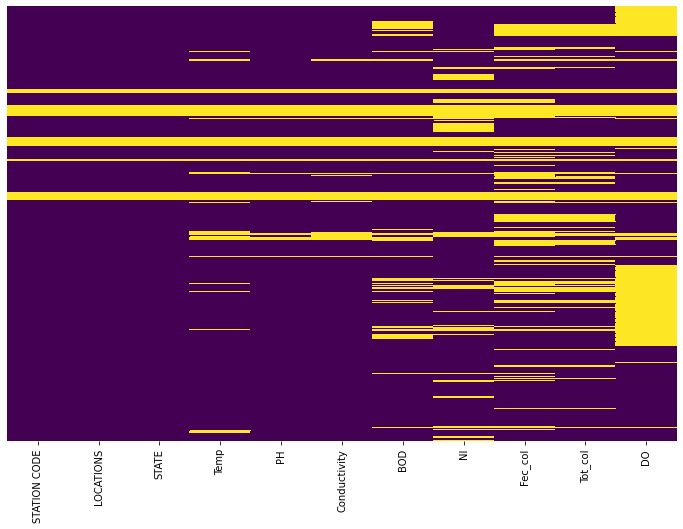

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [93]:
df.to_csv('merged_dataset.csv', index=False)